What is the most important factor in determining survival of the titanic incident?

The most important factor is gender.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
#import dataframe 
data = pd.read_csv("titanic.csv")

#Summary stats
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 PassengerId      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64


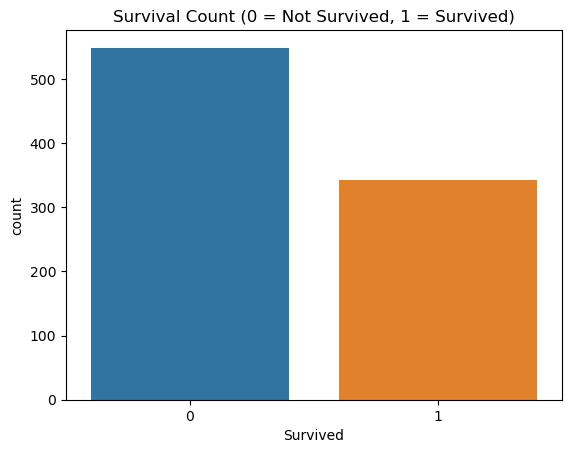

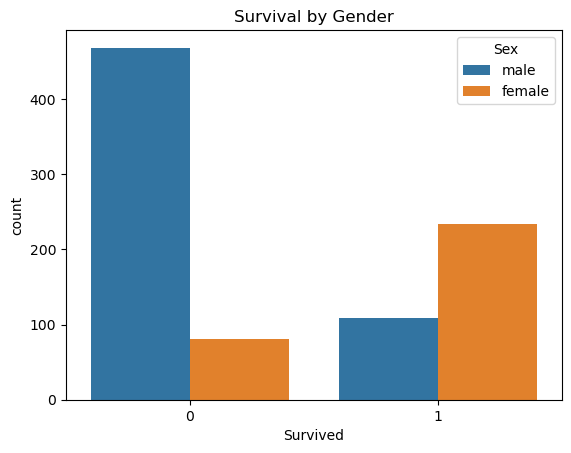

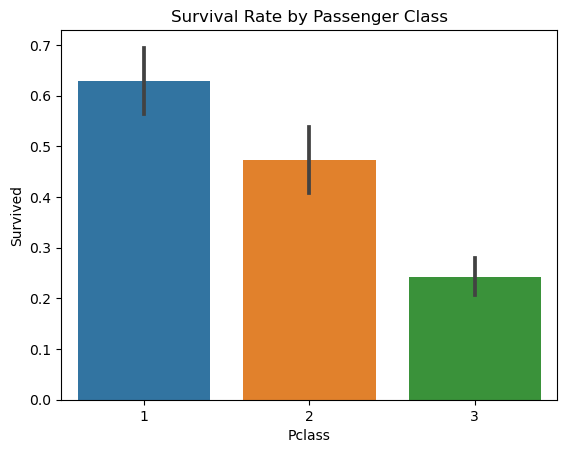

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


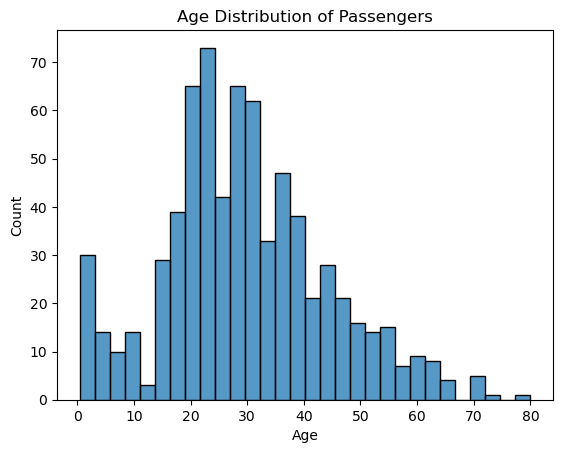

Chi-square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Gender and Survival are dependent


/var/folders/3x/wp66yfsd3gzg96wsr396g_j00000gn/T/ipykernel_28475/2432133562.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=data, ci=None)


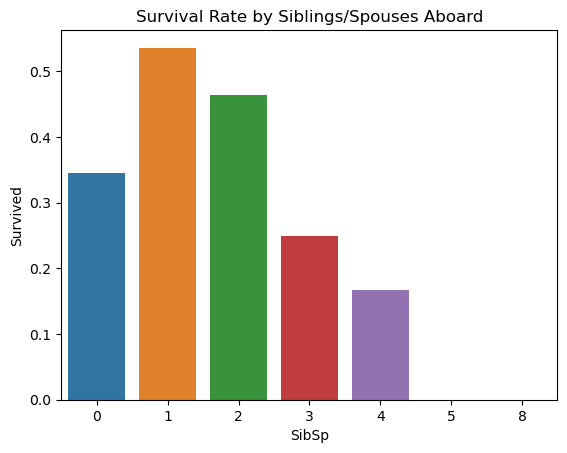

In [6]:

#Check for missing values in the dataset
print(data.isnull().sum())

#Data Visualization
#Survival Count
sns.countplot(x='Survived', data=data)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

#Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()

#Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

#Age Distribution of Passengers
sns.histplot(data['Age'].dropna(), kde=False, bins=30)
plt.title('Age Distribution of Passengers')
plt.show()

#Statistics
#Chi-square test for independence between Gender and Survival
from scipy.stats import chi2_contingency

gender_survival_table = pd.crosstab(data['Survived'], data['Sex'])
chi2, p, dof, expected = chi2_contingency(gender_survival_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)

# nterpretation of the Chi-square test:
if p < 0.05:
    print("Gender and Survival are dependent")
else:
    print("Gender and Survival are independent")

#Additional Observation
#correlation between Siblings/Spouses Aboard and Survival
sns.barplot(x='SibSp', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Siblings/Spouses Aboard')
plt.show()


Were upper class passengers given preference for lifeboats?

After looking at the data above, yes, it seems they were.

Women and children first, was this the case?

Yes the general age and gender trend shows this was the case.

Add one other observation that you have noticed in the dataset

That people with 1 spouse or sibling on board survived the most on average.